<a href="https://colab.research.google.com/github/lokeshtokas/Mobile-Price-Range-Prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Range Prediction

`Predicting mobile price range based on its features set.`


---



## Business Context

---


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 

The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 

In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


---



### Dataset Description

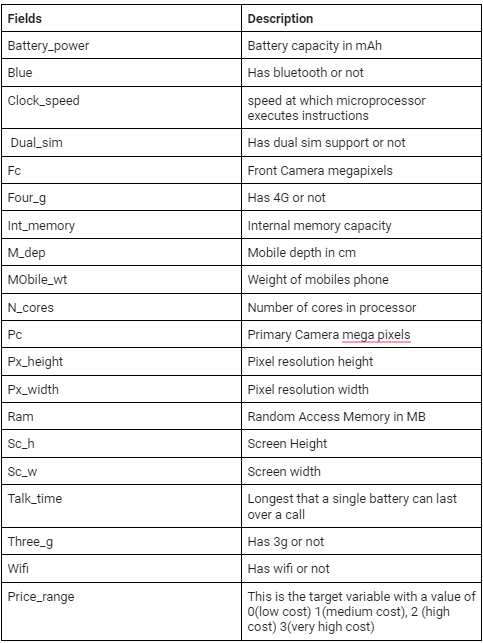





---


# **Data & Problem Interpretation : This is a Multi Class Classification Problem**


---



# EDA

## Data Collection

Libraries

In [411]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
from sklearn.tree import DecisionTreeRegressor

In [412]:
#hiding warning after final edit
import warnings
warnings.filterwarnings('ignore')

### Loading File

In [413]:
data = pd.read_csv('https://raw.githubusercontent.com/lokeshtokas/Mobile-Price-Range-Prediction/main/data_mobile_price_range.csv')

## **Data Overview**

In [414]:
data.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [416]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Data Cleaning

###Detecting data anomoly

**From the data description, we have observerd some anomoly.**

---


> px_height (Pixel Height) = 0

> sc_w (screen width) = 0



---

**we need to examine this data future and decide either to replace or drop.**

In [417]:
print('No of rows with 0 px_height value = ',data[data['px_height'] == 0].shape[0])
print('No of rows with 0 sc_w value = ',data[data['sc_w'] == 0].shape[0])

No of rows with 0 px_height value =  2
No of rows with 0 sc_w value =  180


###Imputation

**Since missing value consists of 9% of the entire data set and we have limit dataset to train, we can't drop these rows.**

**We have to replace these anomulus values.**

**we are going use KNN-Imputer since it will assign nearest possible value and not just a mean/avg value.**



1.   replace 0 with np.nan
2.   import knn-imputer
3.   perform impute




In [418]:
data.loc[data['px_height']== 0, 'px_height'] = np.nan 

In [419]:
data.loc[data['sc_w']== 0, 'sc_w'] = np.nan 

In [420]:
data.isnull().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [421]:
#since np.nan values are less scattered we are going with N neighbours = 3
impute_knn = KNNImputer(n_neighbors=3)

#replacing NaN values with imputed values
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [422]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [423]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0


**All anomulus values have been sucessfully fixed.**

###Outlier Detection

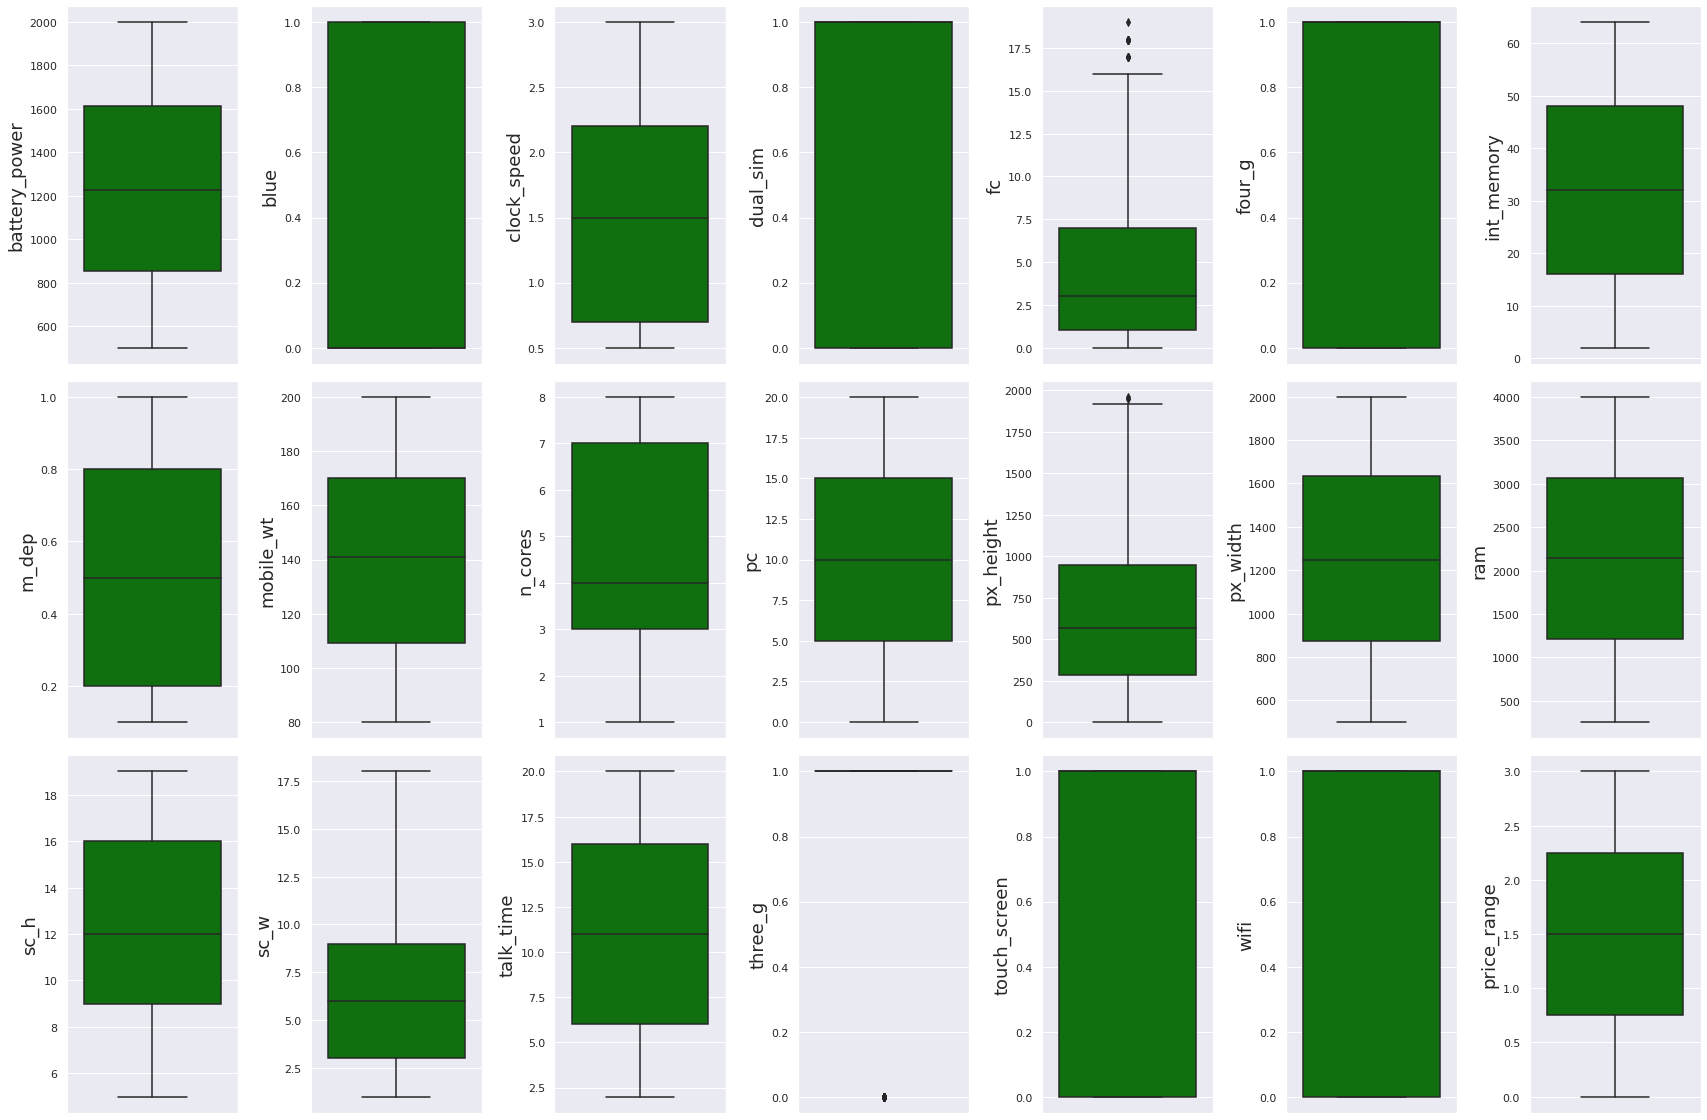

In [424]:
i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(data.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(24, 16))


for col in data.columns :
  plt.tight_layout()  
  f = sns.boxplot(y=data[col], ax=axs[i,j], color = 'green' )
  f.set_ylabel(col,fontsize=18)
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()

**No Extreme Outliers detected.**

- In 'px_height' 1 possible outlier was highlighted but after examination it was observerd to be with in reason.
- In 'fc' few observervations were out of bound but normal to have high megapixel for experimental or emerging technology.

## Data Analysis

###Point Plot of all features on 'price_range'

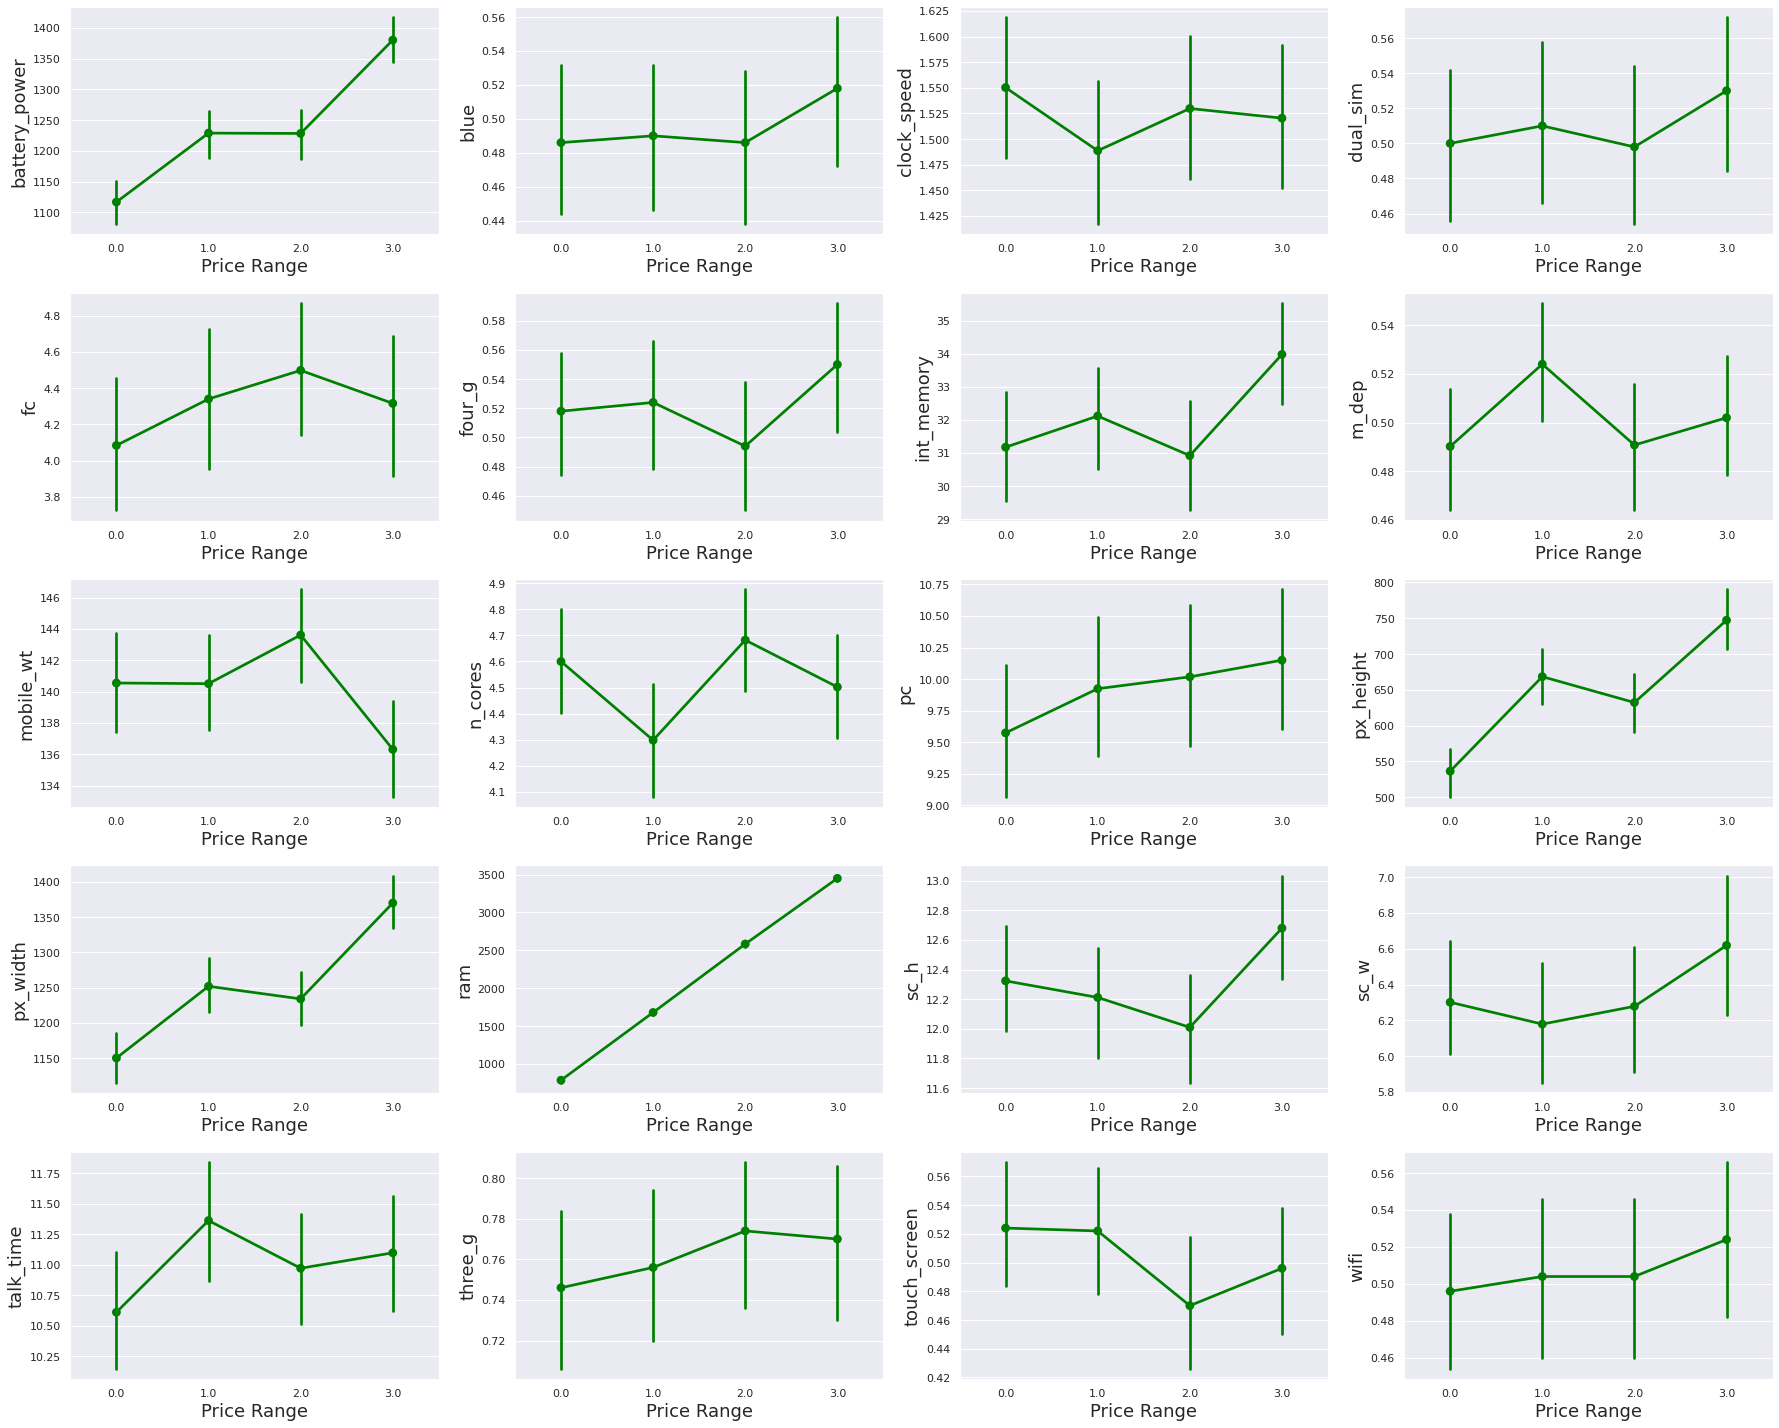

In [425]:
i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(math.ceil((len(data.columns)-1)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(25, 20))

for col in data.columns :
  if col == 'price_range' :
    continue
  else :
    plt.tight_layout()
    f = sns.pointplot(data=data, x='price_range', y=data[col], ax=axs[i,j], color = 'green' )
    f.set_ylabel(col,fontsize=18)
    f.set_xlabel('Price Range',fontsize=18)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()

###Bar Plot of all coloumns except univariate columns & 'price_range'

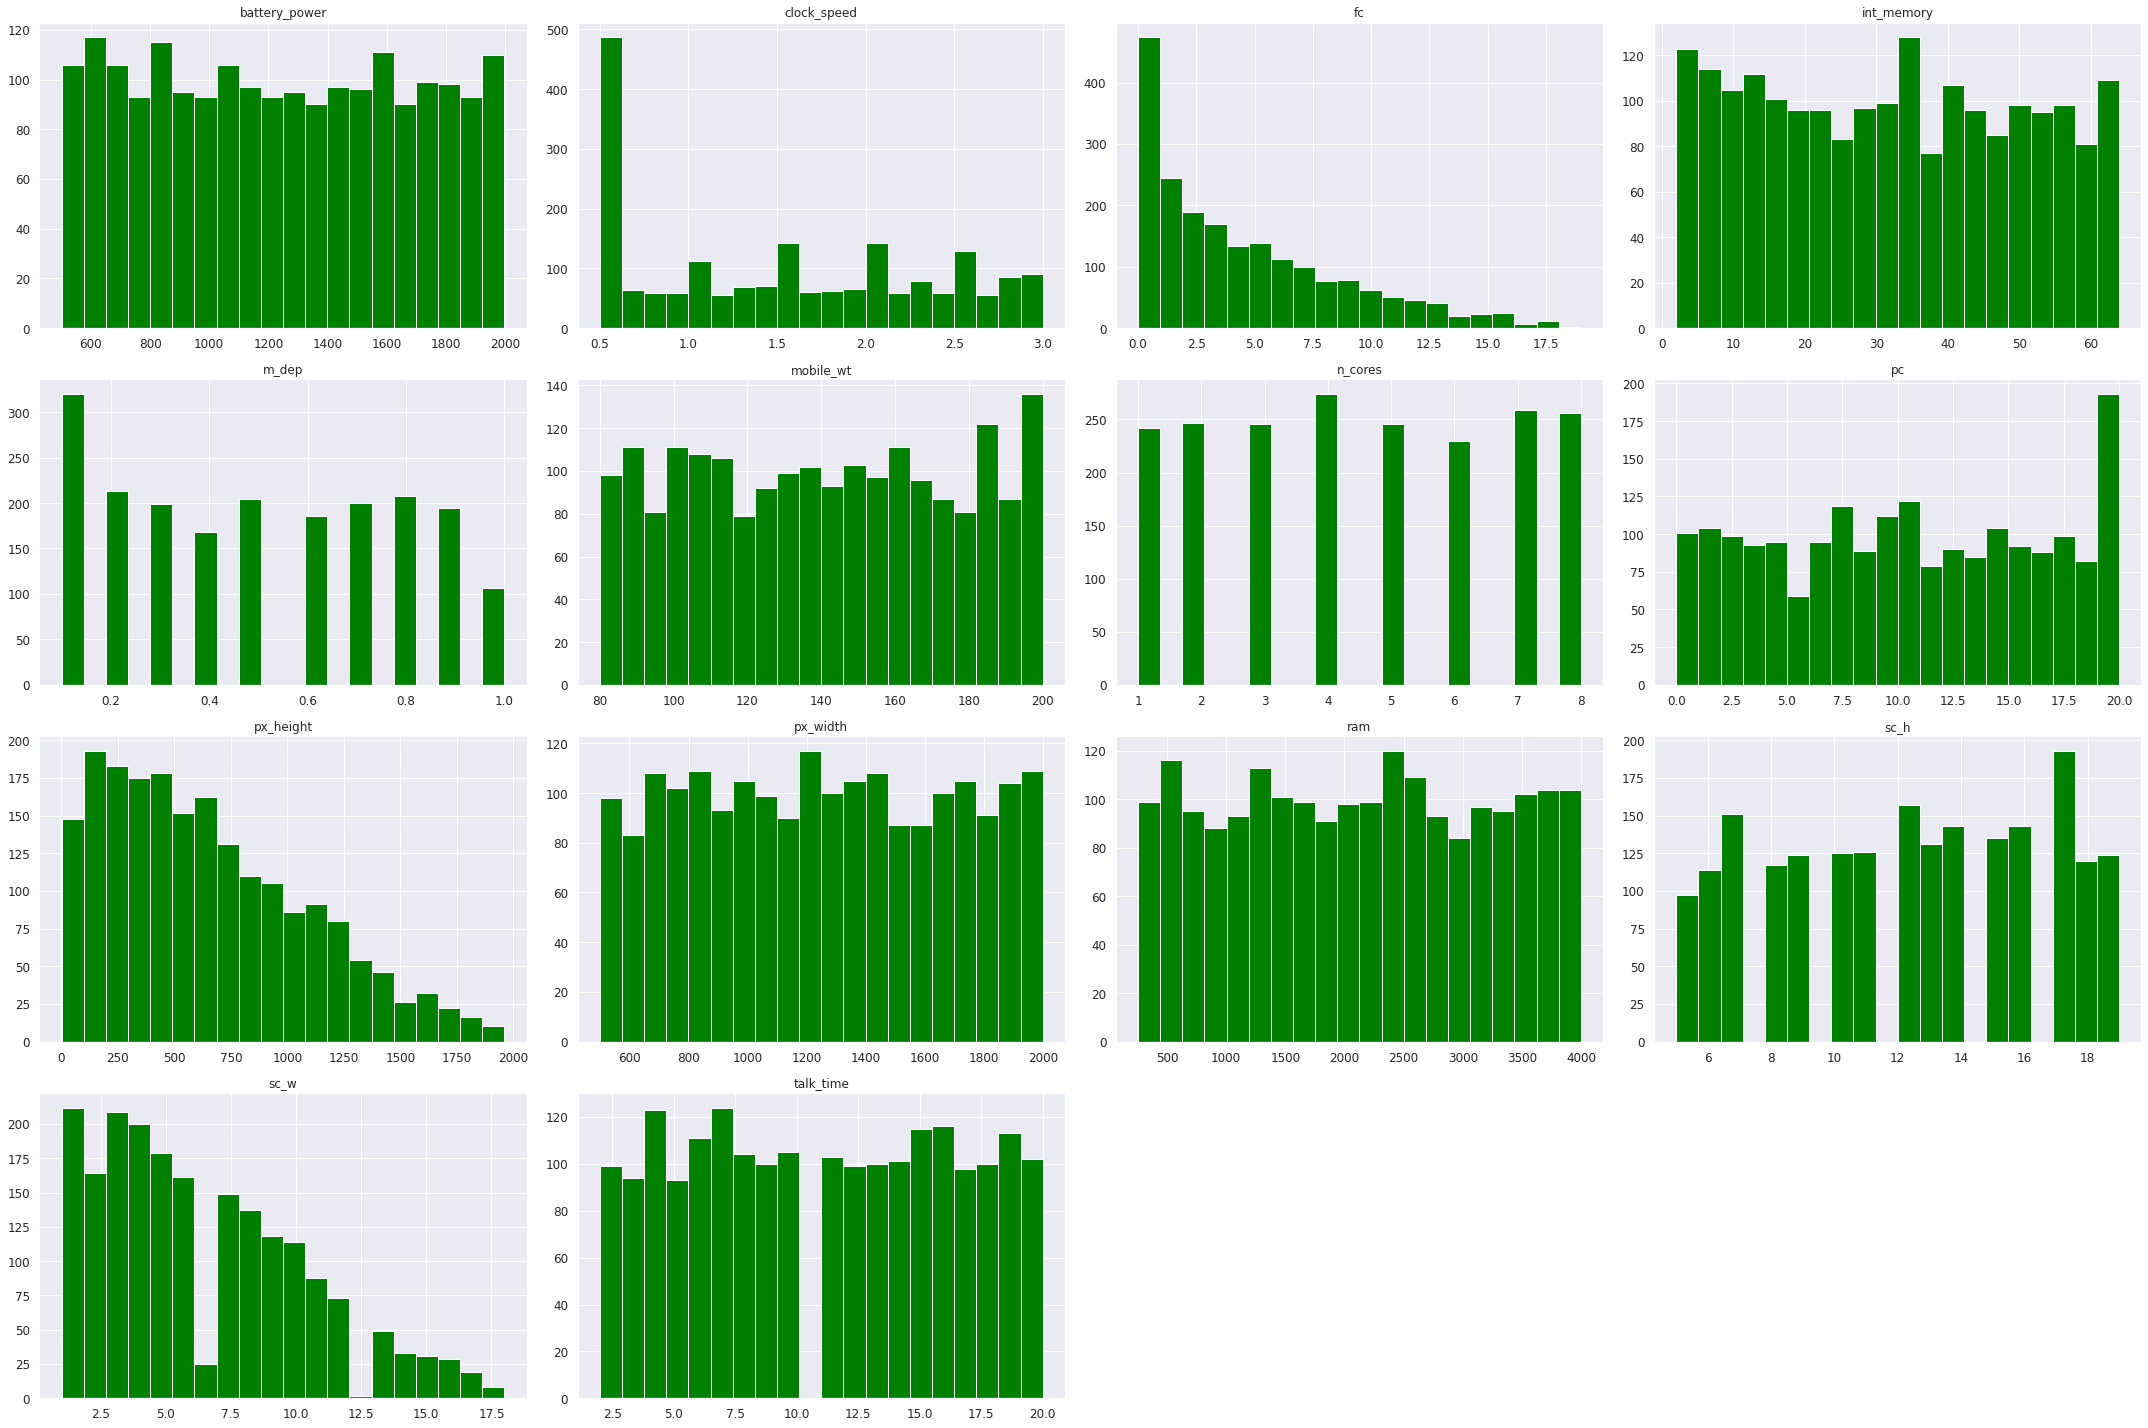

In [426]:
col = ['battery_power','clock_speed','fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
data.hist(bins = 20, figsize = (30,20),color='green', column = col, ylabelsize = 12, xlabelsize = 12)
plt.tight_layout()
plt.show()

###Pie Plot for Univariate Analysis

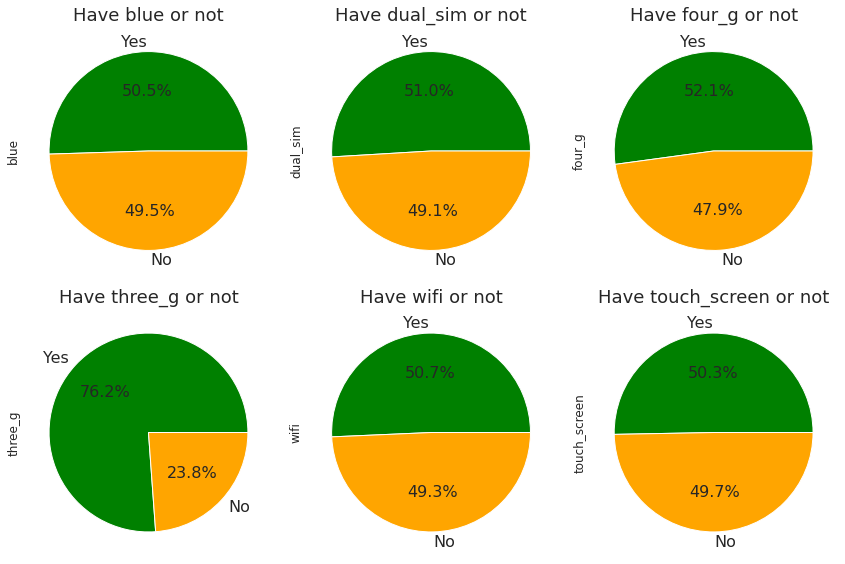

In [427]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(12,8))

rows=2
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  data[var].value_counts().plot.pie(autopct = '%.1f%%', fontsize = 16, labels = labels, colors = ['green', 'orange'])
  plt.title(f'Have {var} or not',fontsize = 18)
  plt.tight_layout()
  count=count+1

###Heatmap to visualise - Corelation


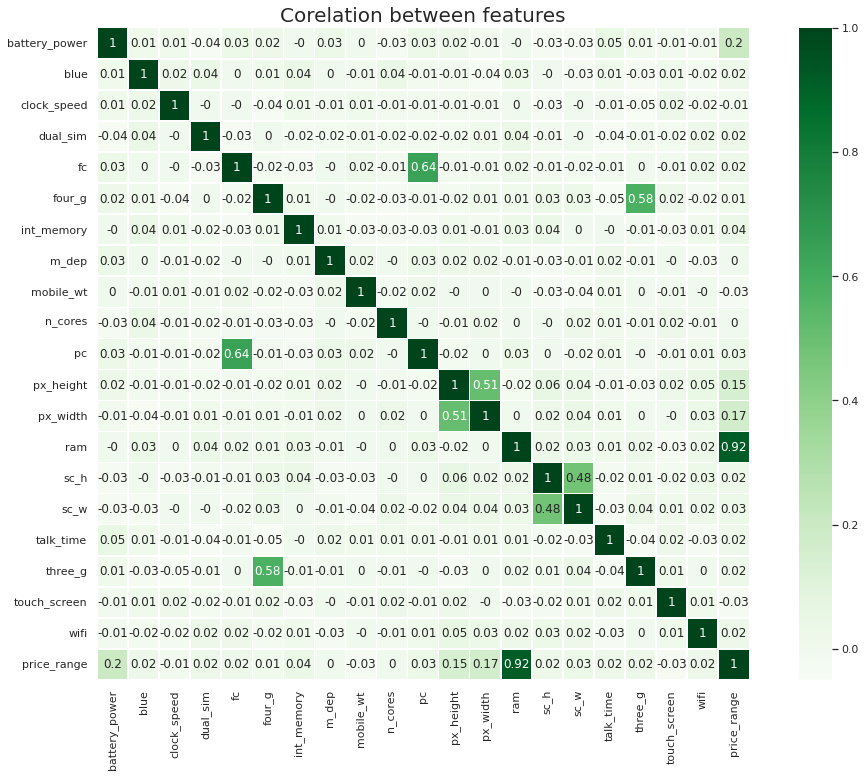

In [428]:
plt.figure(figsize=(18,12))
sns.heatmap(round(data.corr(),2),cmap="Greens",annot=True, square = True,linewidths=.5)
plt.title("Corelation between features",size='20')
plt.show()

###Heatmap to visualise Feature - Covariance

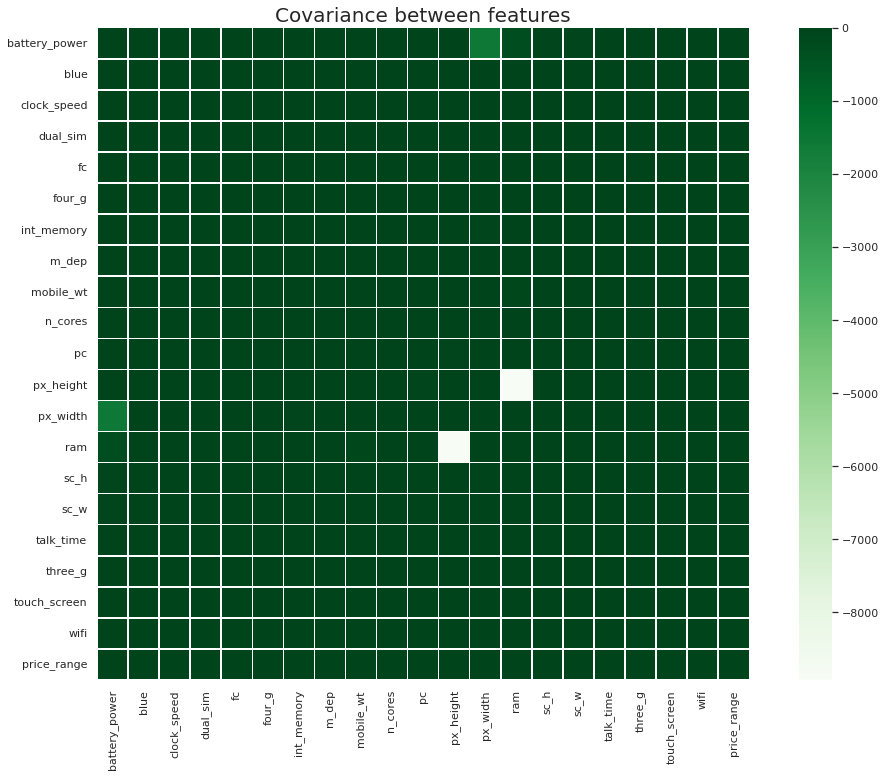

In [429]:
plt.figure(figsize=(18,12))
sns.heatmap(data.cov(), vmax=.8, cmap="Greens", square = True,linewidths=.5)
plt.title("Covariance between features",size='20')
plt.show()

###Observations

- 'ram' & "price range"(target variable) is highly correlated.
> More ram = Higher Price

- 'three_g' & 'four_g' is moderately correlated.

- 'pc' (primary camera) & 'fc' (front camera) is moderately correlated.

- 'px_height' & 'px_width' is moderately correlated.

- 'sc_h' & 'sc_w' (screen height & screen width) is moderately correlated.

# Machine Learning

## Feature Engineering

In [430]:
#converting screen width and height to diagonal.
data['screen'] = round(np.sqrt((data['sc_h']**2)+(data['sc_w']**2)),1)
data.drop(['sc_h','sc_w'],axis=1,inplace=True)

In [431]:
#converting pixel width and height to PPI.
data['ppi'] = np.ceil(np.sqrt((data['px_height']**2)+(data['px_width']**2))/data['screen'])
data.drop(['px_height','px_width'],axis=1,inplace=True)

In [432]:
#moving 'price_range' to last
data['price_range'] = data.pop('price_range')

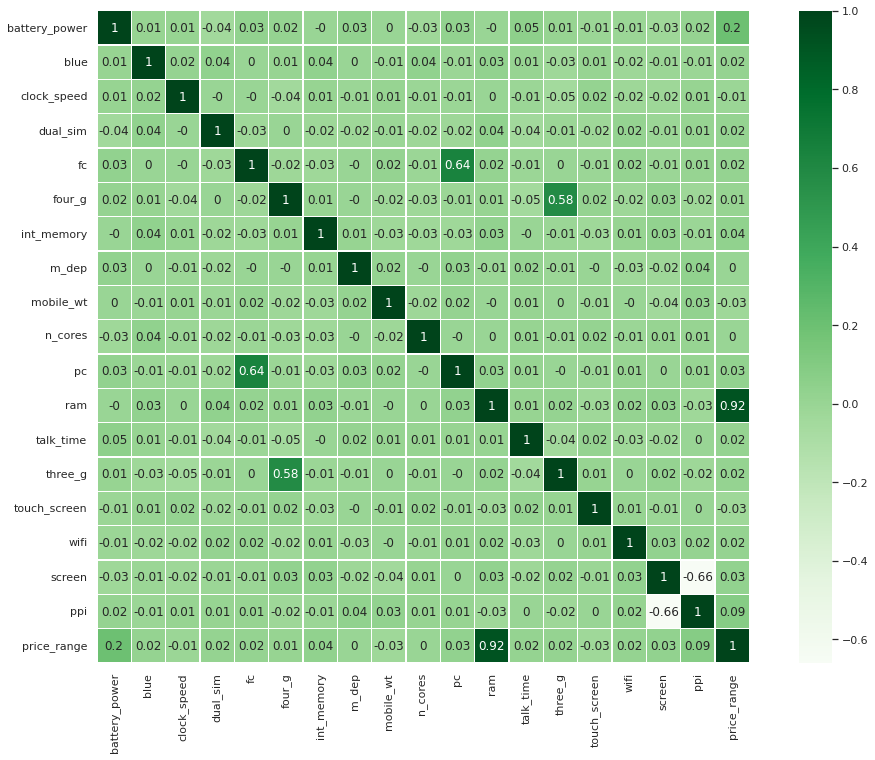

In [433]:
#Checking updated corelation
plt.figure(figsize=(18,12))
sns.heatmap(round(data.corr(),2),cmap="Greens",annot=True, square = True,linewidths=.5)
plt.show()

**Observation**
> Now we also have negative corelation between 'screen' & 'ppi'

### Feature Importance

In [434]:
#Preparing data for Test Train
data_copy = data.copy()
X = data_copy.iloc[:,:18]
y = data_copy.iloc[:,18:]

In [435]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Standardising/Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

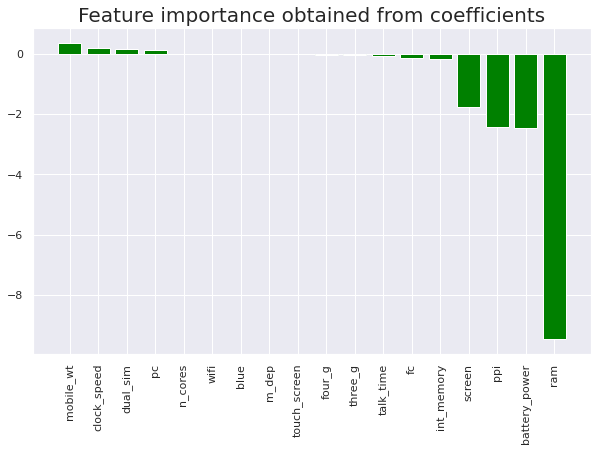

In [436]:
#Creating dataframe to store coefficients
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=False)

#Visualising feature importance by their coefficient values
plt.figure(figsize=(10,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importance obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Dropping non relivant columns**

In [437]:
#Dropping non-important/significant columns.
data_copy.drop(['wifi','blue','m_dep','touch_screen'],axis=1,inplace=True)
X = data_copy.iloc[:,:14]
y = data_copy.iloc[:,14:]

#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Standardising/Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

**Confirming Feature importance after multiple column drop**

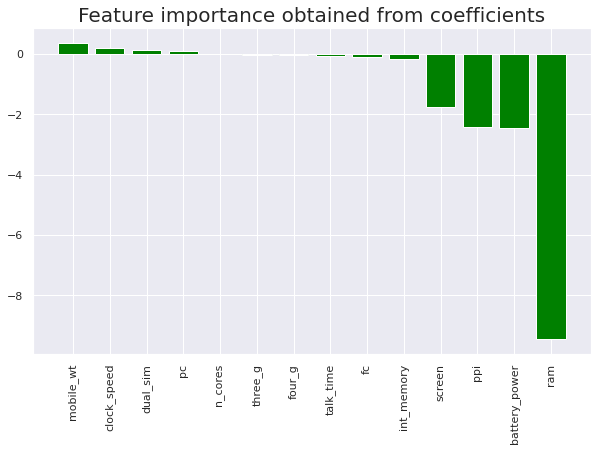

In [438]:
#Creating dataframe to store coefficients
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=False)

#Visualising feature importance by their coefficient values
plt.figure(figsize=(10,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importance obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**This corresponds with heatmap corelation as well.**

## Model Selection

**According to the data, we need to select suitable classification models, we will be comparing between 4 of following models :**

> Logistic regression

> Random Forest

> KNN

>SVM

## Visualisation functions

In [439]:
#Function to visualise confusion matrix

def print_conf_mat(x) :
  plt.figure(figsize=(7,5))
  labels = ['0', '1', '2', '3']
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax, cmap='Greens') 
  # labels, title and ticks
  ax.set_xlabel('Predicted',size = 15)
  ax.set_ylabel('Actual',size = 15)
  ax.set_title('Confusion Matrix',size = 20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

In [440]:
#Function to visualise AUC-ROC Curve

def plot_auc_roc(a,b):
  
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(a, b[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(15,10))
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label= ((f'0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label=((f'1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label=((f'2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='green', label=((f'3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass AUC ROC curve',size = 20)
  plt.xlabel('False Positive',size=15)
  plt.ylabel('True Positive',size=15)
  plt.legend(loc='best')

In [441]:
#Function to print Accuracy Score

def print_details(a_model, flag ='detail', scale = 0) :
  if scale == 1 :
    a_train_preds = a_model.predict(X_train_scaled)
    a_test_preds = a_model.predict(X_test_scaled)
    roc_train = roc_auc_score(y_train, a_model.predict_proba(X_train_scaled), multi_class='ovr')
    roc_test = roc_auc_score(y_test, a_model.predict_proba(X_test_scaled), multi_class='ovr')
    model_pred_prob = a_model.predict_proba(X_test_scaled)
  
  else :  
    a_train_preds = a_model.predict(X_train)
    a_test_preds = a_model.predict(X_test)
    roc_train = roc_auc_score(y_train, a_model.predict_proba(X_train), multi_class='ovr')
    roc_test = roc_auc_score(y_test, a_model.predict_proba(X_test), multi_class='ovr')
    model_pred_prob = a_model.predict_proba(X_test)

  cm_train = confusion_matrix(a_train_preds, y_train)
  cm_test = confusion_matrix(a_test_preds, y_test)

  if flag == 'detail' :
    print("The accuracy on train data is :", accuracy_score(a_train_preds,y_train))
    print("The accuracy on test data is :", accuracy_score(a_test_preds,y_test))
    print('\n')
    print("The confusion matrix on the train data is :")
    print(cm_train)
    print('\n')
    print("The confusion matrix on the test data is :")
    print(cm_test)
    print('\n')

    print("The classification report on the train data is :")
    print(classification_report(a_train_preds, y_train))
    print('\n')
    print("The classification report on the test data is :")
    print(classification_report(a_test_preds, y_test))
    print('\n')

    print("The ROC AUC score on the train data is: ", roc_train)
    print('\n')
    print("The ROC AUC score on the test data is: ", roc_test)

  if flag == 'matrix' :
    print('Confusion Matrix of Test Set')
    print_conf_mat(cm_test)
    print('\n\n')
    print('Confusion Matrix of Train Set')
    print_conf_mat(cm_train)

  if flag == 'roc' :
    plot_auc_roc(y_test,model_pred_prob)

## Logistic Regression

In [442]:
#Initialising logistic regression
model = LogisticRegression(fit_intercept=True, max_iter=10000)

#fitting model
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

###Evaluation Matrix

In [443]:
print_details(model,'detail')

The accuracy on train data is : 0.7486666666666667
The accuracy on test data is : 0.736


The confusion matrix on the train data is :
[[318  44   0   0]
 [ 50 260  65   1]
 [  0  76 240  64]
 [  0   2  75 305]]


The confusion matrix on the test data is :
[[110  12   0   0]
 [ 22  79  23   0]
 [  0  26  73  24]
 [  0   1  24 106]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       362
         1.0       0.68      0.69      0.69       376
         2.0       0.63      0.63      0.63       380
         3.0       0.82      0.80      0.81       382

    accuracy                           0.75      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.75      0.75      0.75      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       122
         1.0       0.6

**Confusion Matrix for Logistic regression classification**

Confusion Matrix of Test Set


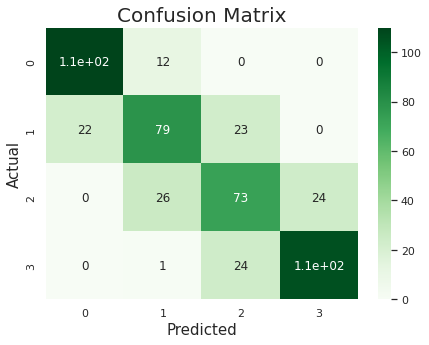




Confusion Matrix of Train Set


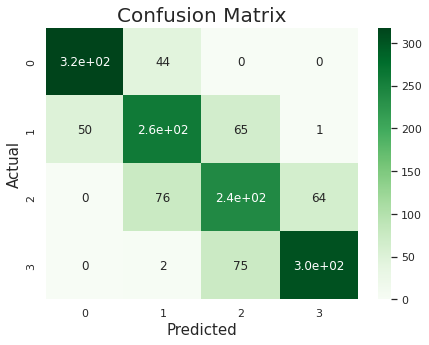

In [444]:
print_details(model,'matrix')

**AUC-ROC Curve of 'price_range' prediction - Logistic Regression Classification**

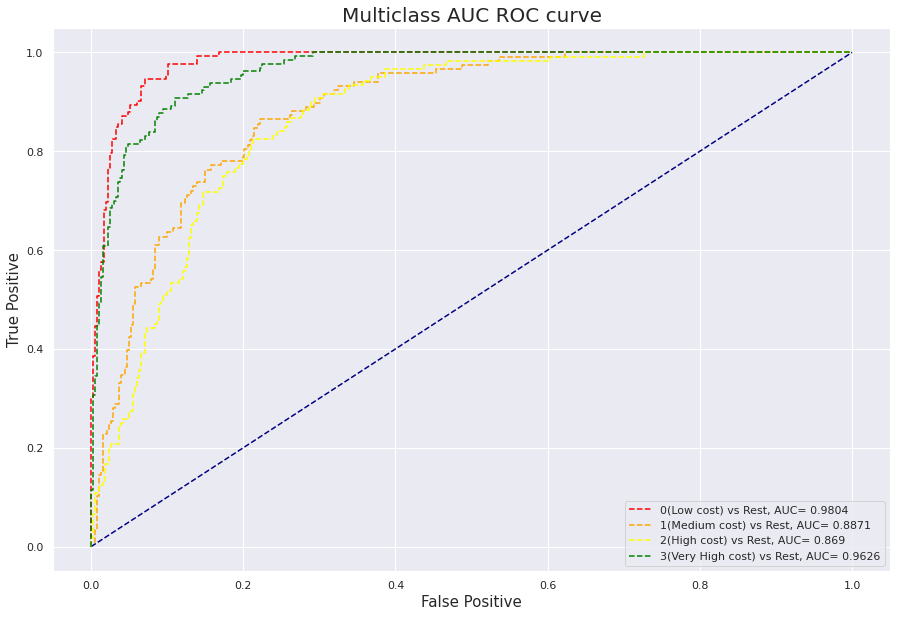

In [445]:
print_details(model,'roc')

###Observations of Logistic Regression CLassification.


> Prediction of price range of Low & Very High Cost is excellent

> Prediction of price range of Medium and High Cost is good.

> Prediction accuracy is very good but not excellent, **Not to optimise.** **bold text**



### Hyper parameter tuning and cross validation of Logistic Regression Classification

In [446]:
#Tuning parameter and cross-validation using RepeatedStartifiedKFold
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 0.1],
    'solver' : ['newton-cg','liblinear'],
    'max_iter' : [10, 50, 100]
    }
]
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

In [447]:
#Parameter fitted into GridSearch 
log_clf = GridSearchCV(model, param_grid = param_grid, cv =cv, verbose=True, n_jobs=-1, scoring='accuracy', error_score=0)

In [448]:
log_tune = log_clf.fit(X_train,y_train)

Fitting 9 folds for each of 36 candidates, totalling 324 fits


In [449]:
log_tune.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [450]:
log_tune.best_score_

0.9026666666666667

**Accuracy can be further improved if max_iterations are increased, but we have capped it to 100 to keep run time under control for GOOGLE COLAB(Free Version)**

**Cross Validation Martix**

In [451]:
print_details(log_tune,'detail')

The accuracy on train data is : 0.9153333333333333
The accuracy on test data is : 0.898


The confusion matrix on the train data is :
[[350  23   0   0]
 [ 18 334  27   0]
 [  0  25 336  17]
 [  0   0  17 353]]


The confusion matrix on the test data is :
[[125   8   0   0]
 [  7 102  12   0]
 [  0   8 102  10]
 [  0   0   6 120]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       373
         1.0       0.87      0.88      0.88       379
         2.0       0.88      0.89      0.89       378
         3.0       0.95      0.95      0.95       370

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       133
         1.0       0.8

Confusion Matrix of Test Set


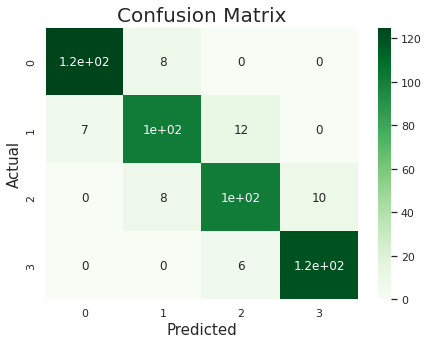




Confusion Matrix of Train Set


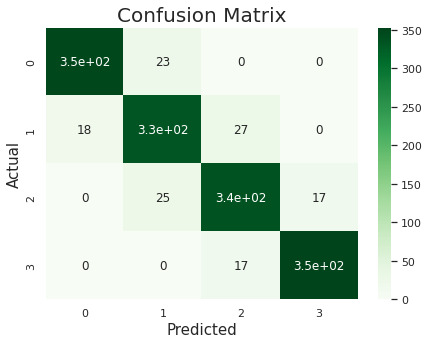

In [452]:
print_details(log_tune,'matrix')

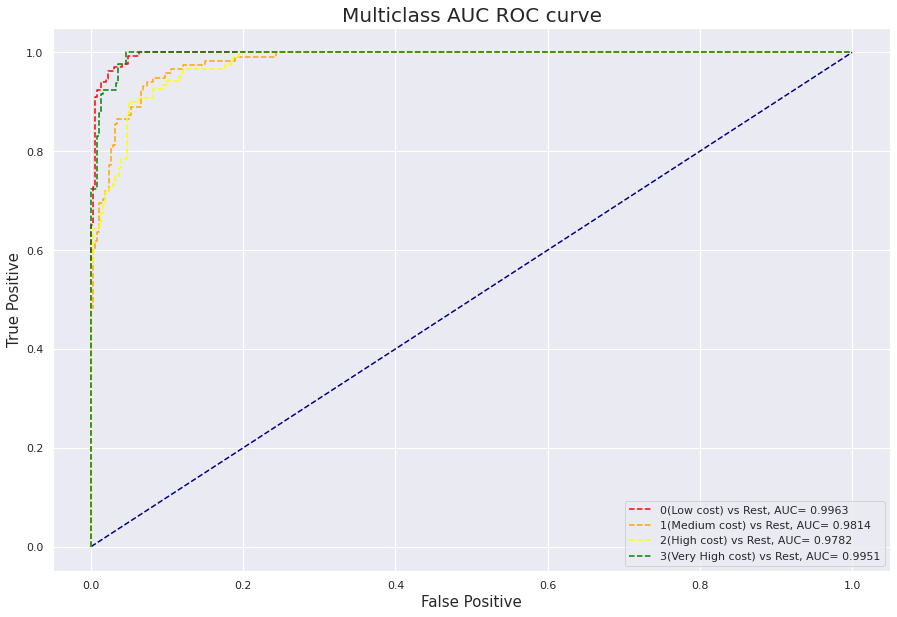

In [453]:
print_details(log_tune,'roc')

### Observation after Parameter tuning of logistic regression

> Overall accuracy has improved to excellent levels

> Prediction accuracy for price_range 1 & 2 has also increased to excellent levels

> Accuracy can be further improved if max_iterations are increased, but we have capped it to 100 to keep run time under control for GOOGLE COLAB(Free Version)

## Random Forest Classification
We choose to go with Random Forest intead of decission tree because it avoids over fitting nature of decission tree.

In [454]:
r_forest = RandomForestClassifier(n_estimators = 100)
r_forest.fit(X_train, y_train)

RandomForestClassifier()

###Feature Importance in Random Forest Classification

In [455]:
#Creating dataframe to store coefficients
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': r_forest.feature_importances_
})

#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=False)

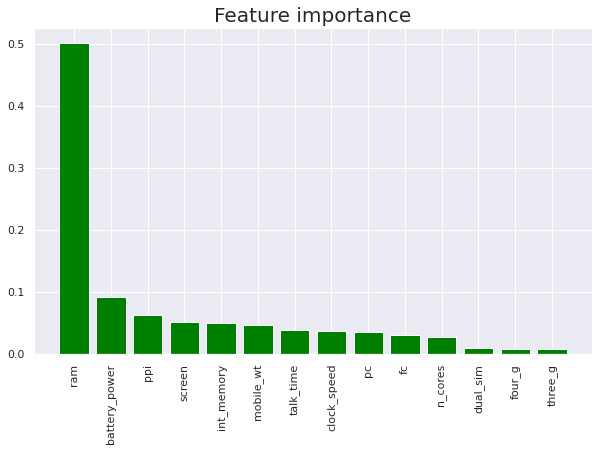

In [456]:
#Visualising feature importance by their coefficient values
plt.figure(figsize=(10,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importance', size=20)
plt.xticks(rotation='vertical')
plt.show()

###Evaluation Matrix

In [457]:
print_details(r_forest,'detail')

The accuracy on train data is : 1.0
The accuracy on test data is : 0.832


The confusion matrix on the train data is :
[[368   0   0   0]
 [  0 382   0   0]
 [  0   0 380   0]
 [  0   0   0 370]]


The confusion matrix on the test data is :
[[127  13   0   0]
 [  5  95  18   0]
 [  0  10  84  20]
 [  0   0  18 110]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       382
         2.0       1.00      1.00      1.00       380
         3.0       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       140
         1.0       0.81      0.81    

###Observation of Random Forest


> Training accuracy is 1, Random Forest is **overfitting**

**Dropping random Forest and moving to next model**

##KNN Classification

In [458]:
#initialising KNN
knn_cl = KNeighborsClassifier(n_neighbors=20)

#fitting model
knn_cl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

###Evaluation Matrix

In [459]:
print_details(knn_cl,'detail')

The accuracy on train data is : 0.8533333333333334
The accuracy on test data is : 0.806


The confusion matrix on the train data is :
[[352  45   0   0]
 [ 16 310  56   0]
 [  0  27 289  41]
 [  0   0  35 329]]


The confusion matrix on the test data is :
[[122  12   0   0]
 [ 10  97  24   0]
 [  0   9  80  26]
 [  0   0  16 104]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       397
         1.0       0.81      0.81      0.81       382
         2.0       0.76      0.81      0.78       357
         3.0       0.89      0.90      0.90       364

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.86      0.85      0.85      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       134
         1.0       0.8

**Confusion Matrix**

Confusion Matrix of Test Set


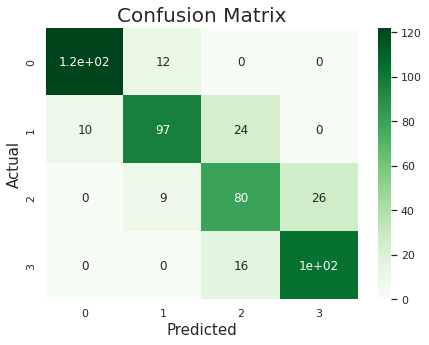




Confusion Matrix of Train Set


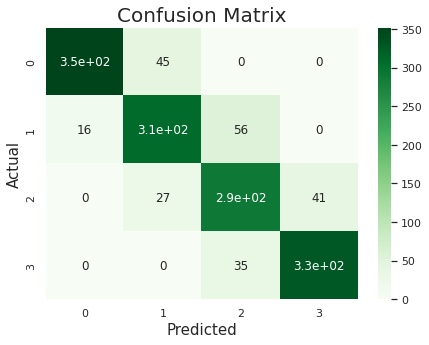

In [460]:
print_details(knn_cl,'matrix')

**AUC-ROC Score**

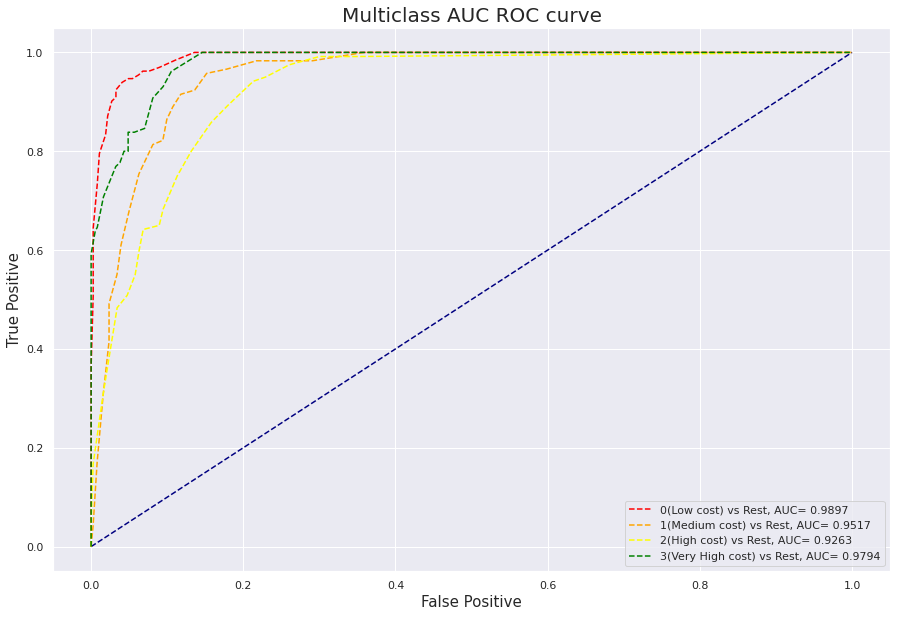

In [461]:
print_details(knn_cl,'roc')

###Observation of KNN Classification

> Prediction accuracy is less than optimised Logistic classification

>AUC-ROC score is better than logistc classification on average for all 4 price_range

**Need to evaluate further with parameter tuning**

###Hyper Parameter tuning of KNN

In [462]:
#Parameter tuning
leaf_size = list(range(1,20))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [463]:
tuned_knn=GridSearchCV(knn_cl, cv=3, scoring='accuracy', verbose=1, param_grid=hyperparameters)
tuned_knn.fit(X_train,y_train)

Fitting 3 folds for each of 1102 candidates, totalling 3306 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [464]:
tuned_knn.best_params_ 

{'leaf_size': 1, 'n_neighbors': 6, 'p': 1}

In [465]:
tuned_knn.best_score_

0.85

**Evaluation Matrix of tunned KNN**

In [466]:
print_details(tuned_knn,'detail')

The accuracy on train data is : 0.8753333333333333
The accuracy on test data is : 0.8


The confusion matrix on the train data is :
[[356  42   0   0]
 [ 12 322  50   0]
 [  0  18 308  43]
 [  0   0  22 327]]


The confusion matrix on the test data is :
[[124  17   0   0]
 [  8  92  24   0]
 [  0   9  82  28]
 [  0   0  14 102]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       398
         1.0       0.84      0.84      0.84       384
         2.0       0.81      0.83      0.82       369
         3.0       0.88      0.94      0.91       349

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       141
         1.0       0.78 

Confusion Matrix of Test Set


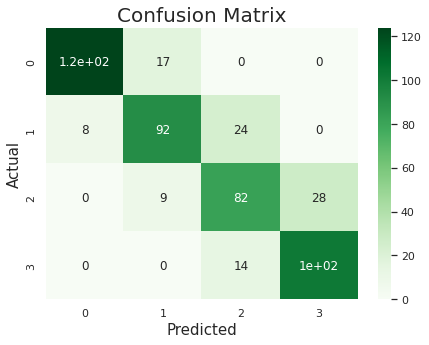




Confusion Matrix of Train Set


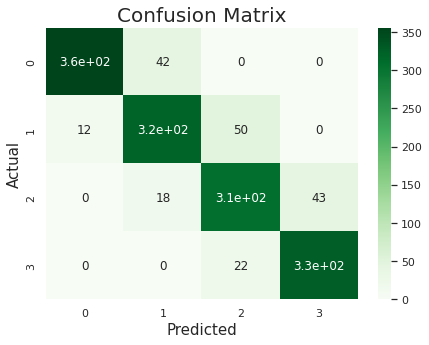

In [467]:
print_details(tuned_knn,'matrix')

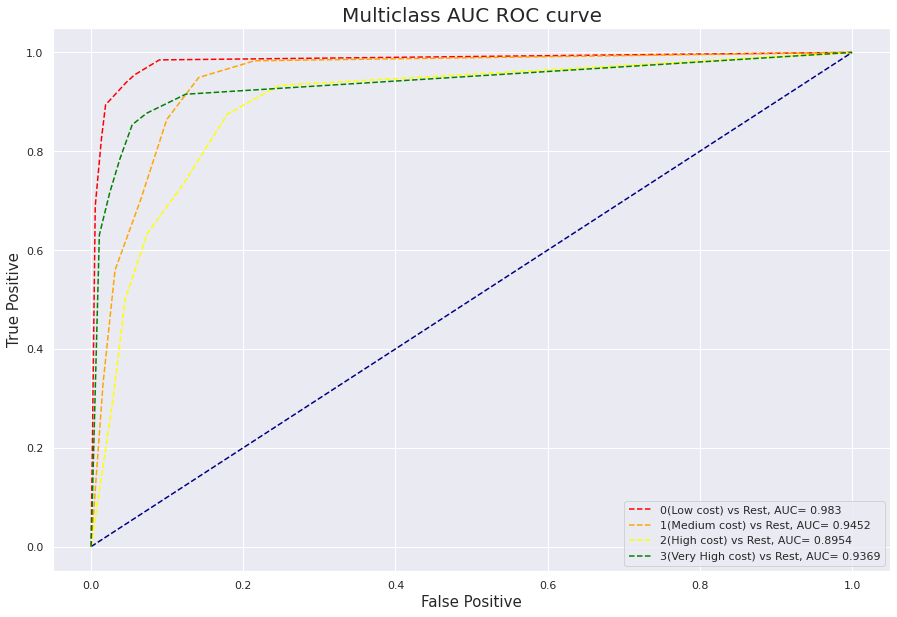

In [468]:
print_details(tuned_knn,'roc')

##Observation after parameter tuning of KNN Classification 

> After optimisation KNN imporved very well.

> But for multiclass 'price_range' prediction of price_range = 2 is slightly less in comparisson with optimised logistic regression.

##SVM Classification

In [469]:
# creating an object of classifier, probability turned on (default is False) for auc score.
svc_model = SVC(probability=True, random_state=99)     
# fitting the model/training the model.
svc_model.fit(X_train_scaled,y_train)    

SVC(probability=True, random_state=99)

###Evaluation Matrix

In [470]:
print_details(svc_model, flag = 'detail', scale = 1)

The accuracy on train data is : 0.964
The accuracy on test data is : 0.862


The confusion matrix on the train data is :
[[363  10   0   0]
 [  5 365  14   0]
 [  0   7 361  13]
 [  0   0   5 357]]


The confusion matrix on the test data is :
[[121   9   0   0]
 [ 11  99  18   0]
 [  0  10  95  14]
 [  0   0   7 116]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       373
         1.0       0.96      0.95      0.95       384
         2.0       0.95      0.95      0.95       381
         3.0       0.96      0.99      0.98       362

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       130
         1.0       0.84      0.77  

**Confusion Matrix**

Confusion Matrix of Test Set


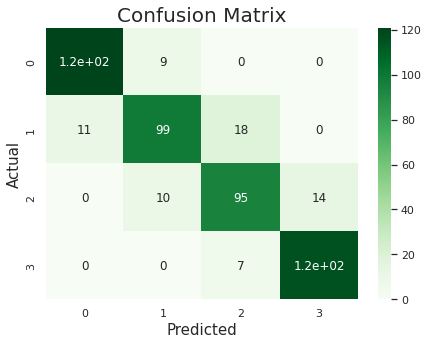




Confusion Matrix of Train Set


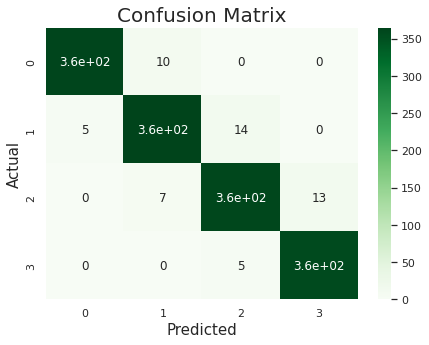

In [471]:
print_details(svc_model, flag = 'matrix', scale = 1)

**AUC-ROC Score**



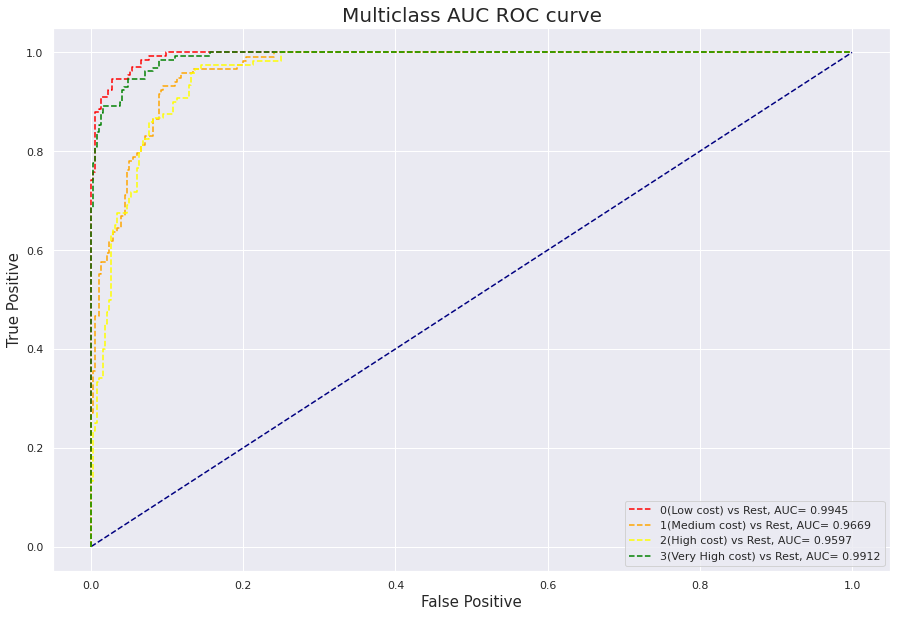

In [472]:
print_details(svc_model, flag = 'roc', scale = 1)

###Observation of SVM

> Model is overfitting but can be fixed by optmisation.

###Hyper parameter Tuning of SVM

In [473]:
#setting custom parameters
grid_values = {
    'C':[0.1,1,10],
    'kernel' : ["linear","rbf","sigmoid"],
    'degree' : [1,3,5],
    'gamma' : [0.01,1]
}

In [474]:
#initialising SVC
svc  = SVC (probability=True)

In [475]:
#running gridsearch and cross validation with custom parameter (gid_values)
svc_cv = GridSearchCV(svc, grid_values, cv = 3 ,verbose=1)
# fitting the data into the model
svc_cv.fit(X_train_scaled,y_train)     

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 3, 5],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=1)

In [476]:
svc_cv.best_estimator_

SVC(C=1, degree=1, gamma=0.01, kernel='linear', probability=True)

**Evaluation Matrix of optimised SVM**

In [477]:
print_details(svc_cv, flag = 'detail', scale = 1)

The accuracy on train data is : 0.916
The accuracy on test data is : 0.892


The confusion matrix on the train data is :
[[353  23   0   0]
 [ 15 338  28   0]
 [  0  21 333  20]
 [  0   0  19 350]]


The confusion matrix on the test data is :
[[124   9   0   0]
 [  8 101  12   0]
 [  0   8 101  10]
 [  0   0   7 120]]


The classification report on the train data is :
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       376
         1.0       0.88      0.89      0.89       381
         2.0       0.88      0.89      0.88       374
         3.0       0.95      0.95      0.95       369

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



The classification report on the test data is :
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       133
         1.0       0.86      0.83  

**confusion matrix of optimised svm**

Confusion Matrix of Test Set


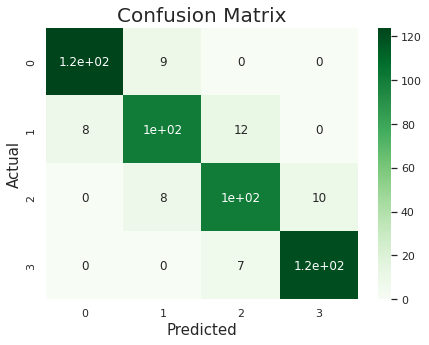




Confusion Matrix of Train Set


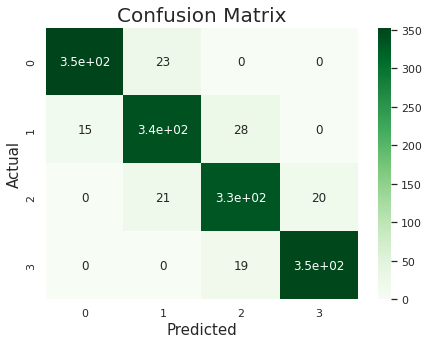

In [478]:
print_details(svc_cv, flag = 'matrix', scale = 1)

**AUC-ROC Scores**

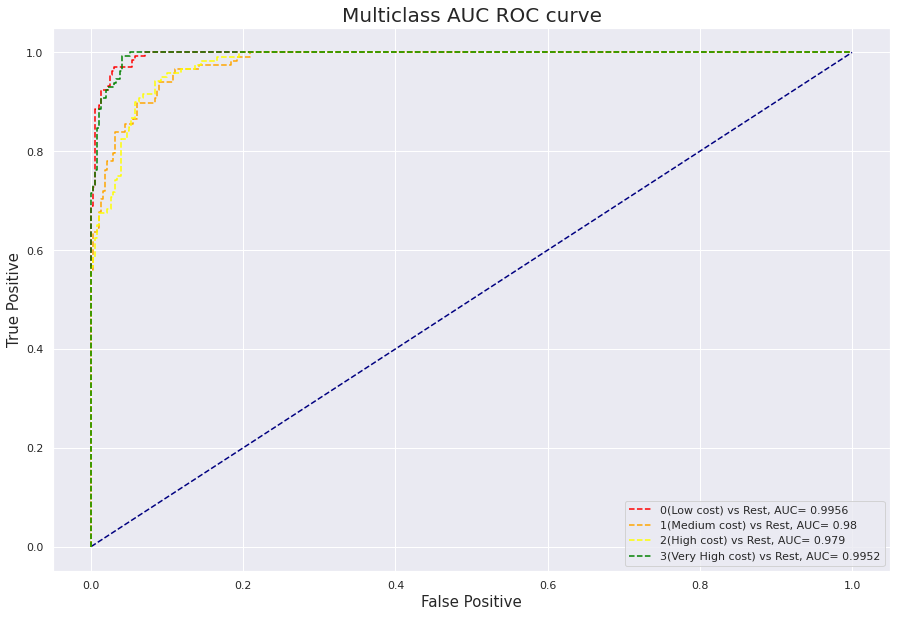

In [479]:
print_details(svc_cv, flag = 'roc', scale = 1)

###Observation after Parameter tuning of SVM classification

> Overfitting is reduced

> Prediction for all 4 price_range is good

#Conclusion

> In EDA there were colomns/features that were inter-related and we engineering new features using them.

> ram and batter_power has the highest impact on price_range.

> Using logistic regeression feature importance we came to understand that some of the columns were not relivant or had no impact negative/positive.
Hence they were dropped.

> We, implemented various classification algorithms, Logistics and SVM acurracy was simlar.

> Logistic regression classification model gave best results after hyper-parameter tuning with 91.5% train accuracy and 89.2% test accuracy score. 

> SVM(Support vector machine) algorithm also gave equally best accuracy after hyper-parameter tuning with 91.6% train accuracy and 89.2 % test accuracy.

> Random Forest was Over-fitting

> KNN after optimisation performed very well but for mutli class price_range the prediction of price_range = 2 was lowered than Logistic and SVM in comparission.

**We will go forward with Logistic regression classification model as using it increases the explainability of price_rage as per business requirement.**